<a href="https://colab.research.google.com/github/santoshkumarvagga/API/blob/main/Linear_Regression_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings('ignore')

In [ ]:
bike_data = pd.read_csv("/content/day.csv", encoding = 'iso-8859-1')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bike_data.shape

(730, 16)

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


NO Null values found

In [ ]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Since they asked only total users, dropping causal and registered columns
Instant column dont add any value to our analysis, hence dropping it
dteday seems redundant, since the info can be inferred from day month and year columns, hence dropping dteday column

In [ ]:
bike_data = bike_data.drop(['instant', 'dteday','casual', 'registered'], axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bike_data.shape

(730, 12)

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Visualising Numerical variables

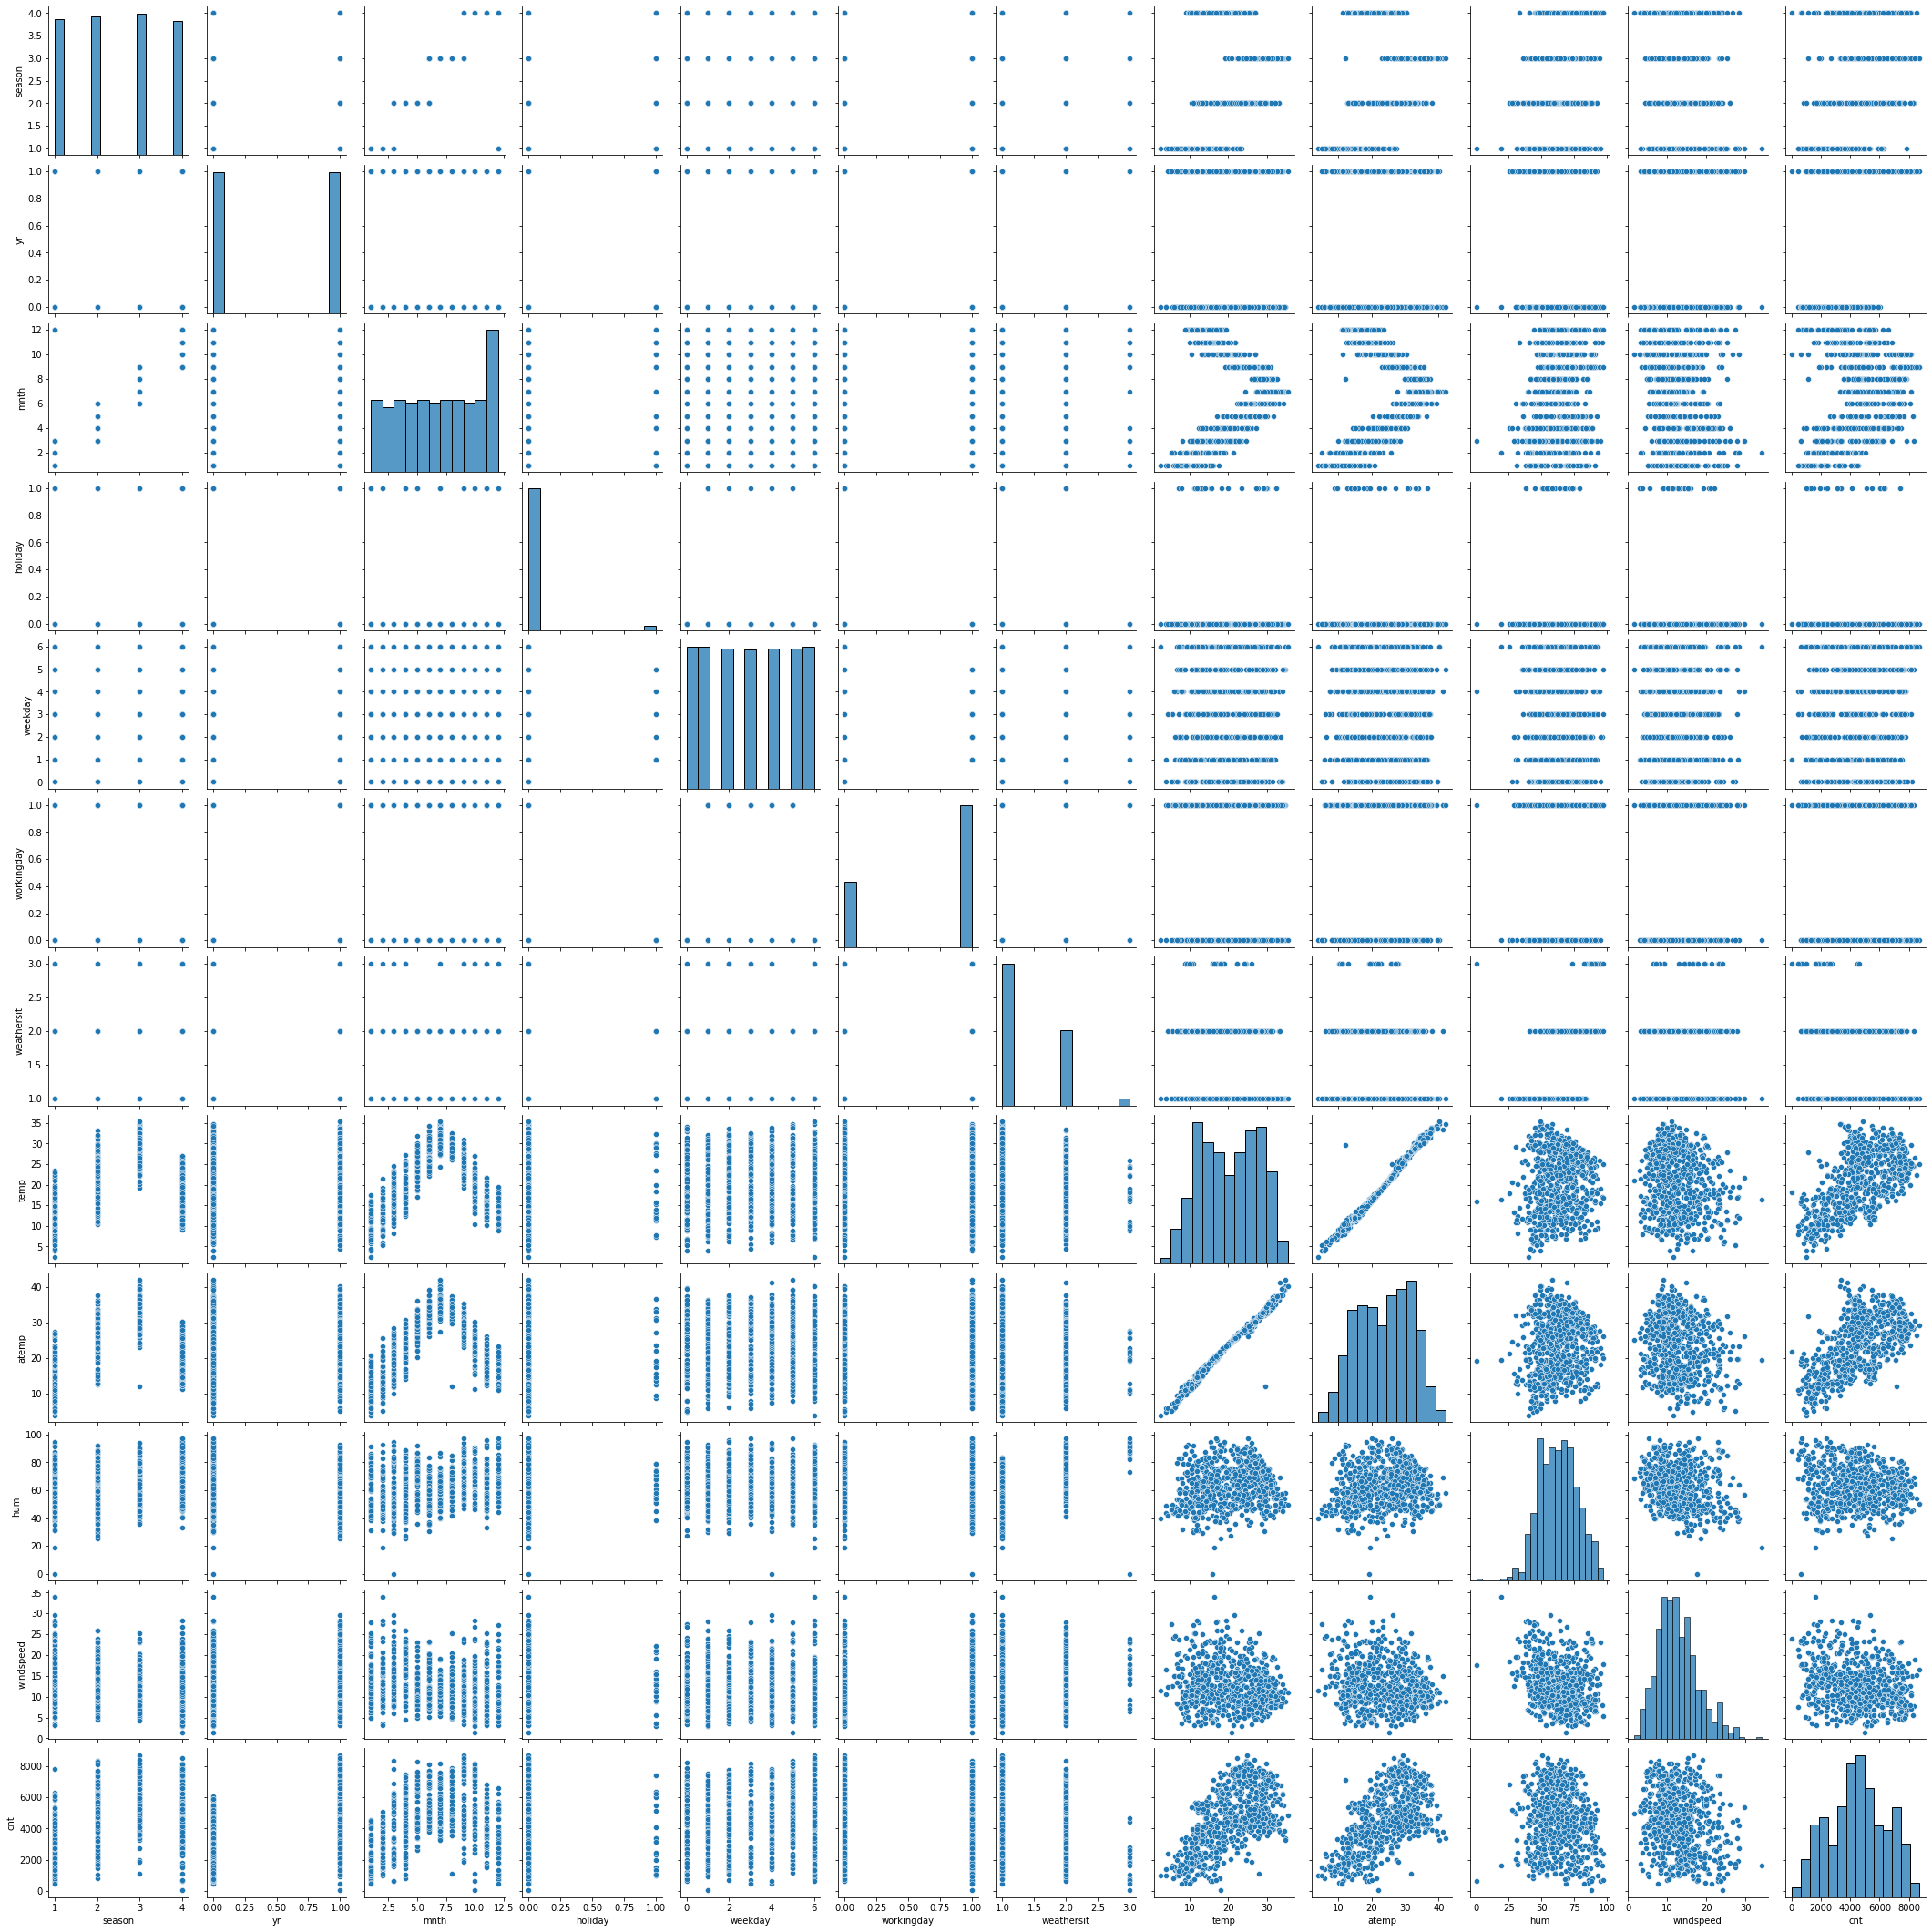

In [ ]:
import seaborn as sns

sns.pairplot(bike_data)
plt.show()

from the heat map, temp and atemp seems more corealted to each other(Due to the presence of Linear straight line). Assuming temp is best measure than atemp since it is realsitic, dropping atemp

---



In [ ]:
bike_data = bike_data.drop(['atemp'], axis = 1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


Few of the categorical columns are having integers and they dont follow certain order, hence convert them to strings

Converting season to String Values

In [ ]:
def func(x):
  if x == 1: return "Spring"
  elif x == 2: return "Summer"
  elif x==3: return "Fall"
  elif x==4: return "Winter"
  else: return "NO SEASON SPECIFIED"

bike_data['season']= bike_data['season'].apply(lambda x:func(x))
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,Spring,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,Spring,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,Spring,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


Converting mnth to String Values

In [ ]:
def func(x):
  if x == 1: return "Janaury"
  elif x==2: return "Fenruary"
  elif x==3: return "March"
  elif x==4: return "April"
  elif x==5: return "May"
  elif x==6: return "June"
  elif x==7: return "July"
  elif x==8: return "August"
  elif x==9: return "September"
  elif x==10: return "October"
  elif x==11: return "November"
  elif x==12: return "December"
  else: return "NO MONTH SPECIFIED"

bike_data['mnth']= bike_data['mnth'].apply(lambda x:func(x))
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Janaury,0,6,0,2,14.110847,80.5833,10.749882,985
1,Spring,0,Janaury,0,0,0,2,14.902598,69.6087,16.652113,801
2,Spring,0,Janaury,0,1,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,Janaury,0,2,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,Janaury,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,December,0,4,1,2,10.420847,65.2917,23.458911,2114
726,Spring,1,December,0,5,1,2,10.386653,59.0000,10.416557,3095
727,Spring,1,December,0,6,0,2,10.386653,75.2917,8.333661,1341
728,Spring,1,December,0,0,0,1,10.489153,48.3333,23.500518,1796


Converting weekday to String Values

In [ ]:
def func(x):
  if x==1: return "Monday"
  elif x==2: return "Tuesday"
  elif x==3: return "Wednesday"
  elif x==4: return "Thursday"
  elif x==5: return "Friday"
  elif x==6: return "Saturday"
  elif x==0: return "Sunday"
  else: return "NO DAY SPECIFIED"

bike_data['weekday']= bike_data['weekday'].apply(lambda x:func(x))
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Janaury,0,Saturday,0,2,14.110847,80.5833,10.749882,985
1,Spring,0,Janaury,0,Sunday,0,2,14.902598,69.6087,16.652113,801
2,Spring,0,Janaury,0,Monday,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,Janaury,0,Tuesday,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,Janaury,0,Wednesday,1,1,9.305237,43.6957,12.522300,1600


Converting Weathersit to String Values

In [ ]:
def func(x):
  if x==1: return "Clear"
  elif x==2: return "Cloudy"
  elif x==3: return "Light snow & rain"
  elif x==4: return "Heavy Snow & rain"
  else: return "NO WEATHER INFO"

bike_data['weathersit']= bike_data['weathersit'].apply(lambda x: func(x))
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Janaury,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Janaury,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Janaury,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Janaury,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Janaury,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,December,0,Thursday,1,Cloudy,10.420847,65.2917,23.458911,2114
726,Spring,1,December,0,Friday,1,Cloudy,10.386653,59.0000,10.416557,3095
727,Spring,1,December,0,Saturday,0,Cloudy,10.386653,75.2917,8.333661,1341
728,Spring,1,December,0,Sunday,0,Clear,10.489153,48.3333,23.500518,1796


Visualising categorical variables(season, month, weekday,weathersit)




Visualising "Season"

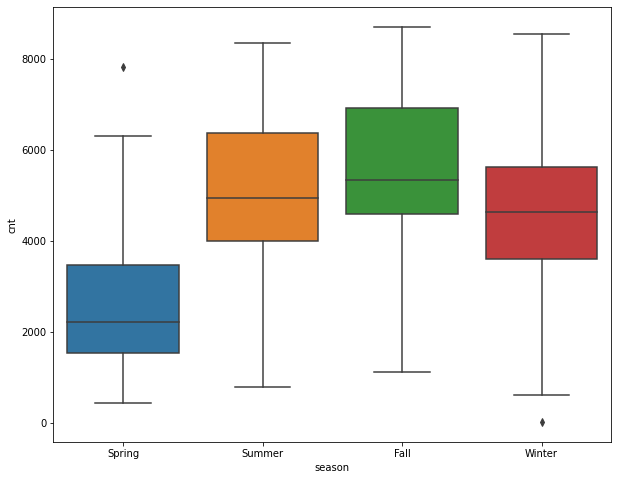

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='season', y ='cnt', data=bike_data)

Observations: Bike Sharings/Bookings were high during "Fall", followed by "Summer" and "Winter". "Spring" has least number of Bike Shares.

Visualising "Mnth"

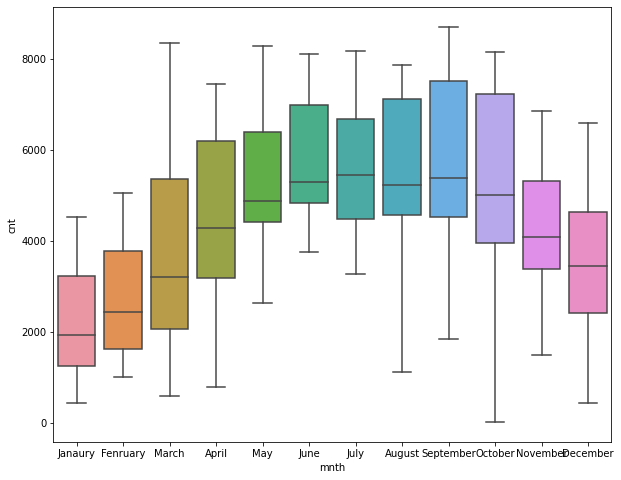

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mnth', y ='cnt', data=bike_data)

Observations: Bike Sharing/Bookings are more during September, October and August respextively, in order. 
and "lowest" during start of the year i,e. from January to March and at the end of year from November and December.

Visualising "weekday"

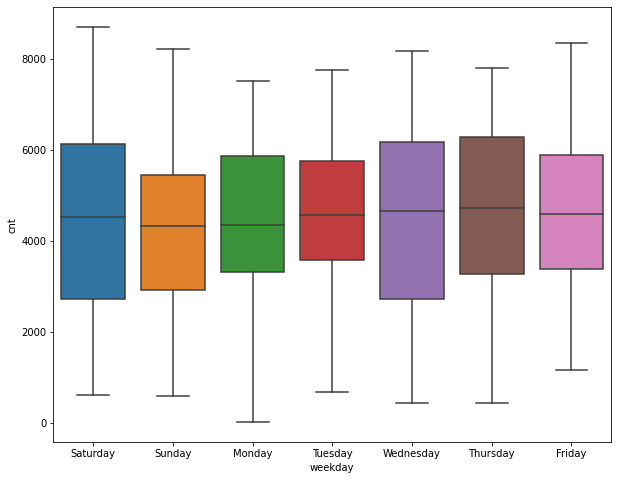

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='weekday', y ='cnt', data=bike_data)


Observations: Friday, Saturday and Sunday have more bookings compared to other days.



Visualising Weathersit

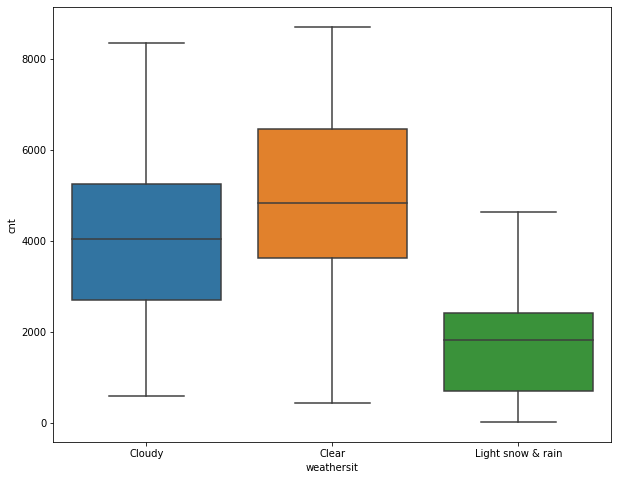

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='weathersit', y ='cnt', data=bike_data)

Observations: More Bookings when Climate is Clear, followed by Cloudy. But Lowest when climate is Light Snow and rainy.

Split into Train and Test Data

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state=100)

In [ ]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
576,Fall,1,July,0,Tuesday,1,Clear,29.246653,70.4167,11.083475,7216
426,Spring,1,March,0,Saturday,0,Cloudy,16.980847,62.1250,10.792293,4066
728,Spring,1,December,0,Sunday,0,Clear,10.489153,48.3333,23.500518,1796
482,Summer,1,April,0,Saturday,0,Cloudy,15.443347,48.9583,8.708325,4220
111,Summer,0,April,0,Friday,1,Cloudy,13.803347,72.9583,14.707907,1683


In [ ]:
df_train.shape

(510, 11)

In [ ]:
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
184,Fall,0,July,1,Monday,0,Cloudy,29.793347,63.7917,5.459106,6043
535,Summer,1,June,0,Wednesday,1,Clear,32.082500,59.2083,7.625404,6211
299,Winter,0,October,0,Thursday,1,Cloudy,19.270000,81.2917,13.250121,2659
221,Fall,0,August,0,Wednesday,1,Clear,31.433347,42.4167,13.417286,4780
152,Summer,0,June,0,Thursday,1,Clear,29.315000,30.5000,19.583229,4968


In [ ]:
df_test.shape

(220, 11)

Scaling the Independent variales

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

Applying Scaling for only Numeric Variables.

In [ ]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
# Create list of numeric variables
num_var = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']

In [ ]:
df_train[num_var]=Scaler.fit_transform(df_train[num_var])
df_train = df_train[num_var]
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.204096
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973
111,0.0,0.0,1.0,0.345824,0.751824,0.380981,0.191095


Just to See correlation between these variables, lets do this:

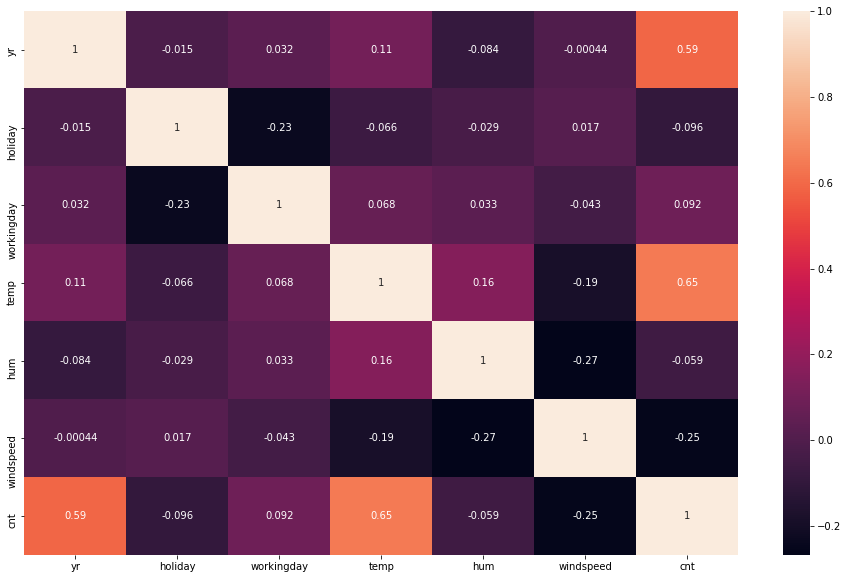

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

Observations: Temprature and Year seem to be more corelated with the output variable 'cnt'




Lets Build our Model. Starting with all variables and removing one by one based on p-values and VIF

For trainign the model, lets create X_train and Y_train from df_train

In [ ]:
Y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0.0,1.0,0.815169,0.725633,0.264686
426,1.0,0.0,0.0,0.442393,0.640189,0.255342
728,1.0,0.0,0.0,0.245101,0.498067,0.663106
482,1.0,0.0,0.0,0.395666,0.504508,0.188475
111,0.0,0.0,1.0,0.345824,0.751824,0.380981


In [ ]:
Y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [ ]:
import statsmodels.api as sm
# Build a model with all variables
X_train_sm = sm.add_constant(X_train)

# Create  Model
lr = sm.OLS(Y_train, X_train_sm)

# fit model
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     235.5
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.41e-142
Time:                        18:01:46   Log-Likelihood:                 379.97
No. Observations:                 510   AIC:                            -745.9
Df Residuals:                     503   BIC:                            -716.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3188      0.032      9.880      0.000       0.255       0.382
yr             0.2308      0.010     22.274      0.000       0.210       0.251
holiday       -0.0656      0.033     -1.959      0.051      -0.131       0.000
workingday     0.0109      0.011      0.968      0.334      -0.011       0.033
temp           0.5707      0.023     24.299      0.000       0.525       0.617
hum           -0.2404      0.037     -6.516      0.000      -0.313      -0.168
windspeed     -0.2448      0.032     -7.718      0.000      -0.307      -0.182
==============================================================================
Omnibus:                       16.182   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.109
Skew:                          -0.345   Prob(JB):                     7.09e-05
Kurtosis:                       3.650   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets Calculate VIF (Variance Inflation Factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif  = pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,8.75
3,temp,6.41
5,windspeed,3.45
2,workingday,3.13
0,yr,2.01
1,holiday,1.07


Lets remove HIGH P-values first, i,e. working day = 0.33 which is much greater than 0.05 (accepted range for p-value). 
Here, working day becomes InSignificant for predicting the output variable 'cnt'

In [ ]:
# Dropping workingday column
X = X_train.drop('workingday', axis=1)
X.head()

,yr,holiday,temp,hum,windspeed
576,1.0,0.0,0.815169,0.725633,0.264686
426,1.0,0.0,0.442393,0.640189,0.255342
728,1.0,0.0,0.245101,0.498067,0.663106
482,1.0,0.0,0.395666,0.504508,0.188475
111,0.0,0.0,0.345824,0.751824,0.380981


Re-build model

In [ ]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     282.5
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.27e-143
Time:                        18:01:46   Log-Likelihood:                 379.50
No. Observations:                 510   AIC:                            -747.0
Df Residuals:                     504   BIC:                            -721.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3256      0.031     10.346      0.000       0.264       0.387
yr             0.2311      0.010     22.307      0.000       0.211       0.251
holiday       -0.0730      0.033     -2.242      0.025      -0.137      -0.009
temp           0.5717      0.023     24.365      0.000       0.526       0.618
hum           -0.2400      0.037     -6.503      0.000      -0.312      -0.167
windspeed     -0.2456      0.032     -7.746      0.000      -0.308      -0.183
==============================================================================
Omnibus:                       17.673   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.528
Skew:                          -0.376   Prob(JB):                     3.49e-05
Kurtosis:                       3.633   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calulate VIF again

In [ ]:
vif  = pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,7.91
2,temp,6.31
4,windspeed,3.40
0,yr,2.00
1,holiday,1.03


All variables seems to be significant since p-value < 0.05. But VIF value for "hum" is high(> 5). Lets drop this column too.

In [ ]:
# Dropping hum column
X = X.drop('hum', axis=1)
X.head()

,yr,holiday,temp,windspeed
576,1.0,0.0,0.815169,0.264686
426,1.0,0.0,0.442393,0.255342
728,1.0,0.0,0.245101,0.663106
482,1.0,0.0,0.395666,0.188475
111,0.0,0.0,0.345824,0.380981


Re-build Model

In [ ]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     316.7
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          4.23e-136
Time:                        18:01:46   Log-Likelihood:                 358.95
No. Observations:                 510   AIC:                            -707.9
Df Residuals:                     505   BIC:                            -686.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1597      0.019      8.332      0.000       0.122       0.197
yr             0.2379      0.011     22.192      0.000       0.217       0.259
holiday       -0.0689      0.034     -2.035      0.042      -0.135      -0.002
temp           0.5533      0.024     22.839      0.000       0.506       0.601
windspeed     -0.1952      0.032     -6.104      0.000      -0.258      -0.132
==============================================================================
Omnibus:                       24.565   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.955
Skew:                          -0.444   Prob(JB):                     1.90e-07
Kurtosis:                       3.818   Cond. No.                         8.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RE-calculate VIF

In [ ]:
vif  = pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,3.06
3,windspeed,2.70
0,yr,1.98
1,holiday,1.02


Since all Predictor variables have valid in-range values for both P-values(<0.05) and VIF(<=5). This is our set of Predictor varibales for Predicting output variable 'cnt'

Residual Analysis: Lets ensure error terms criteia for Linear Regression
* Error terms(Residuals should be normally distributed, i,e. mean should centered at zero)
* Error terms should be independent
* Linear relationship between Predictor Variables and Output Variable
* Equal Standard variance among all error terms

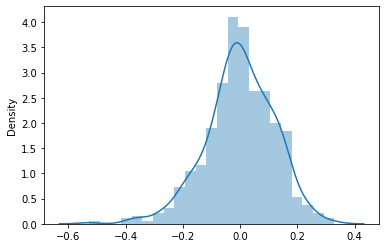

In [ ]:
Y_train_pred = lr_model.predict(X_train_sm)
# lets plot historgram of residuals
res = Y_train - Y_train_pred
sns.distplot(res)

Yes. The tip of curve is pointing at Zero. i,.e Residuals follow Normal Distribution and other assumptions too.

NOTE: R-Squared and Adjusted R-Squared for Training data are 0.715 and 0.713 respectively.

Lets Calculate for Test Data

Evalution and Predictions on Test Data 

In [ ]:
# Considering same set of numerical variables as we did for Scaling in Train data
num_var = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']

# applying transform on same Scaler used for train data
df_test[num_var] = Scaler.transform(df_test[num_var])
df_test = df_test[num_var]
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0.0,1.0,0.0,0.831783,0.657364,0.084219,0.692706
535,1.0,0.0,1.0,0.901354,0.610133,0.153728,0.712034
299,0.0,0.0,1.0,0.511964,0.837699,0.334206,0.303382
221,0.0,0.0,1.0,0.881625,0.437098,0.339570,0.547400
152,0.0,0.0,1.0,0.817246,0.314298,0.537414,0.569029


In [ ]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


Now, find X_test and Y_test

In [ ]:
Y_test = df_test.pop('cnt')
X_test = df_test

# add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed
184,1.0,0.0,1.0,0.0,0.831783,0.657364,0.084219
535,1.0,1.0,0.0,1.0,0.901354,0.610133,0.153728
299,1.0,0.0,0.0,1.0,0.511964,0.837699,0.334206
221,1.0,0.0,0.0,1.0,0.881625,0.437098,0.339570
152,1.0,0.0,0.0,1.0,0.817246,0.314298,0.537414


In [ ]:
# Lets drop the columns dropped in above process using p-values and VIF.

# We have dropped workingday and hum in above steps.

X_test_sm = X_test_sm.drop(['workingday','hum'], axis=1)
X_test_sm.head()

,const,yr,holiday,temp,windspeed
184,1.0,0.0,1.0,0.831783,0.084219
535,1.0,1.0,0.0,0.901354,0.153728
299,1.0,0.0,0.0,0.511964,0.334206
221,1.0,0.0,0.0,0.881625,0.339570
152,1.0,0.0,0.0,0.817246,0.537414


Make Predictions

In [ ]:
Y_test_pred = lr_model.predict(X_test_sm)

Evaluate the Model

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=Y_test, y_pred=Y_test_pred)

0.6831300342434318

NOTE: R-Squared value of Test Data is 0.68. and R-squared value of Train Data is 0.71.

Conclusion on model fitness : Yes, since 0.71-0.68=0.3 is less than 5% of 0.71 (approx= 3.55), We conclude the model didnot underwent overfitting and behaves reasonbly well to predict output variable on any test data sets.

Overall Recomendations to Bike Sharing company based on observations of coefficients, 
Output Variable is predicted for alomost 70% of varinace due to four Predictor Variables - Yr, holiday, temp, windspeed. 
Following equation will quantify the linear relation:
-----------------------------------------------------------------------
Y = 0.2379*yr +0.5533*temp-0.0689*holiday-0.1952*windspeed+0.1597
-------------------------------------------------------------------------

where Y is output variable 'cnt'

Recommendations in words:Have your Bikes to Share in adequate amount in following scenarios only: for more profit and better utilisation of Bikes


--------------------------------------------------------------------------
* for Categorical Variables, based on box-plot observations:

1) Season: Bike Sharings/Bookings were high during "Fall", followed by "Summer" and "Winter".

2) Month: Bike Sharing/Bookings are more during September, October and August respextively, in order. 
"Lowest" during start of the year i,e. from January to March and at the end of year from November and December.

3) Weekday: Friday, Saturday and Sunday have more bookings compared to other days.

4) Climate: More Bookings when Climate is Clear, followed by Cloudy. But Lowest when climate is Light Snow and rainy.

--------------------------------------------------------------------------

* for numerical variables, based on model:

- The output variable Biks sharing total count(cnt) is raising from year to year (i,e. it has increased from 2018 year to 2019 year drastically, So hope more profits and more demands for Bikes in coming years as well)

- Another Positive factor is temprature, as per equation, a unit increase in temprature suggests 0.5 times increase in demand for bikes. So Fall and Summer are best time for the company.

- Negatively affecting factor includes holiday like sunday where bookings are reduced comoaritvely to friday and saturday. So keep more bikes on Friday and Saturday.

- Another Negatively affecting factor is windspeed, a unit increase in windspeed may decrease total bike sharings by 0.19 times. hence dont expect more bike sharings at higher wind speeds.
